**My imports**

In [55]:
# Data manipulation(cleaning), Plot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
import nltk
from nltk.corpus import stopwords; # nltk.download('stopwords');
from nltk import tokenize
from nltk import pos_tag
from nltk.tokenize import word_tokenize; # nltk.download('punkt');
import re
from spellchecker import SpellChecker
from collections import Counter

# Prep ML - Split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle

**Reading the training dataset**

In [2]:
myDataset = pd.read_csv("../Dataset/training_set_rel3.tsv", sep='\t', encoding='ISO-8859-1');
myDataset.head(4)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
myDataset.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [4]:
myDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [5]:
# 12975 essays
myDataset.shape

(12976, 28)

In [6]:
myDataset.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [7]:
# Dropna() is a pandas function that is used to remove missing values (NaN) from a pandas dataframe or series.
myDataset.dropna(axis=1,inplace=True)

In [8]:
# Count of Types of essays inside training dataset
myDataset['essay_set'].value_counts()

5    1805
2    1800
6    1800
1    1783
4    1770
3    1726
7    1569
8     723
Name: essay_set, dtype: int64

In [9]:
myDataset[myDataset['essay_set']==1].head(7)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8
5,6,1,"Dear @LOCATION1, I think that computers have a...",4,4,8
6,7,1,Did you know that more and more people these d...,5,5,10


In [10]:
myDataset.drop(columns=['rater1_domain1','rater2_domain1'],inplace=True,axis=1)

In [11]:
print(min(myDataset['domain1_score']),'-', max(myDataset['domain1_score']))

0 - 60


**Skew** calculates the skewness of the data set. It measures the asymmetry of the data distribution. Skewness can be positive, negative or undefined. Positive skewness means that the data in the data set is concentrated on the right side of the mean. Negative skewness means that the data in the data set is concentrated on the left side of the mean.

In [12]:
myDataset.skew(numeric_only=True)

essay_id         0.044368
essay_set        0.067896
domain1_score    2.475881
dtype: float64

**Kurtosis** is a statistical measure used to describe the degree of peakedness or flatness of a distribution. It is used to measure the degree of tailedness, or skewness, of the probability distribution of a given random variable - as opposed to the more commonly quoted measure of skew.

In [13]:
myDataset.kurtosis(numeric_only=True)

essay_id        -1.174375
essay_set       -1.151431
domain1_score    6.077899
dtype: float64

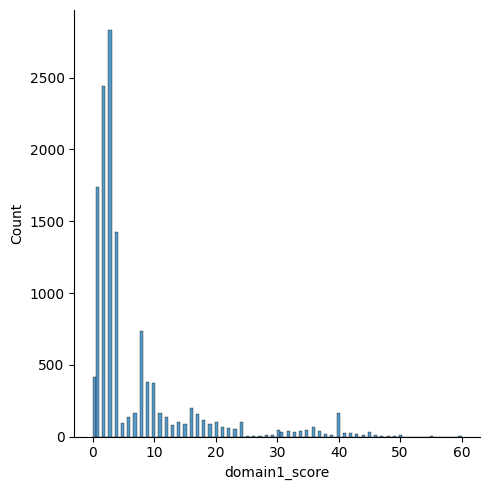

In [14]:
sns.displot(myDataset['domain1_score'])

In [15]:
myDataset[myDataset['essay_set']==1]['domain1_score']

0        8
1        9
2        7
3       10
4        8
        ..
1778     8
1779     7
1780     8
1781     2
1782     7
Name: domain1_score, Length: 1783, dtype: int64

**Normalization** is used to adjust values such as weights, balances, and other measures to a specific scale. For example, it can be used to adjust scores into a range of 0-100. This helps in comparing different variables on the same scale.

In [16]:
# Essay types
# 1) newspaper, 1785 training, 592 final, 350 words, (Score 1+2 = Resovled Score),Rubric 1-6, Resolved scoring 2-12 (Persuasive/ Narrative/Expository)
# 2) censorship, 1800 training, 600 final, 350 words, (R1D1, R1D2, R2D1, R2D2, D1_resolved, D2_resolved), D1 1-6, D2 1-4 (Persuasive/ Narrative/Expository)
# 3) cyclist, 1726 training, 575 final, 150 words, (R1 + R2 = resolved cr score), Rubric 0-3 (source)
# 4) Saeng - source dependent, 1772 training, 589 final, (R1 + R2 = resolved), Rubric 0-3 (source)
# 5) describe mood - source dependent, 1805 training, 601 final, 150 words, Score 1 + Score 2 = Final Score, Score 0-4 (source)
# 6) builders of empire bulilding, 1800 training, 600 final, 150 words, Score 1 + Score 2 = Final Score, Score 0-4 (source)
# 7) patience, 1730 training, 578 final, 250 words, Rater1 + Rater2 = Resolved, Rubric 0-15, total 0-30 (resolved) (Persuasive/ Narrative/Expository)
# 8) benefits of laughter, 918 training, 305 final, 650 words, Rater1+Rater2+Rater3 = Resolved, Rater 0-30, resolved 0-60 (see doc) (Persuasive/ Narrative/Expository)

#Normalizing all of the essays according to the marking scheme found in the dataset.
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,mi,ma):
    #print("Before Normalization: "+str(x))
    x = (x-mi)/(ma-mi)
    #print("After Normalization : "+str(x))
    return round(x*10)

#Saving normalization inside a new colomn
myDataset['normalized_score']=myDataset.apply(lambda x:normalize(x['domain1_score'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)

In [17]:
myDataset['normalized_score']

0        6
1        7
2        5
3        8
4        6
        ..
12971    6
12972    5
12973    7
12974    7
12975    7
Name: normalized_score, Length: 12976, dtype: int64

/tmp/ipykernel_88583/50458760.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(myDataset['normalized_score'])


<AxesSubplot: xlabel='normalized_score', ylabel='Density'>

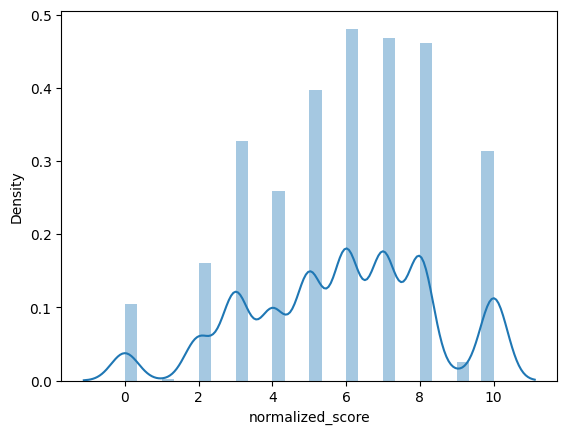

In [18]:
sns.distplot(myDataset['normalized_score'])

In [19]:
myDataset.skew()

/tmp/ipykernel_88583/420642455.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  myDataset.skew()


essay_id            0.044368
essay_set           0.067896
domain1_score       2.475881
normalized_score   -0.248956
dtype: float64

In [20]:
myDataset.tail()

,essay_id,essay_set,essay,domain1_score,normalized_score
12971,21626,8,In most stories mothers and daughters are eit...,35,6
12972,21628,8,I never understood the meaning laughter is th...,32,5
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,7
12974,21630,8,Trippin' on fen...,40,7
12975,21633,8,Many people believe that laughter can improve...,40,7


In [21]:
myDataset.describe()

,essay_id,essay_set,domain1_score,normalized_score
count,12976.000000,12976.000000,12976.000000,12976.000000
mean,10295.395808,4.179485,6.800247,5.849877
std,6309.074105,2.136913,8.970705,2.466040
min,1.000000,1.000000,0.000000,0.000000
25%,4438.750000,2.000000,2.000000,4.000000
50%,10044.500000,4.000000,3.000000,6.000000
75%,15681.250000,6.000000,8.000000,8.000000
max,21633.000000,8.000000,60.000000,10.000000


In [22]:
myDataset.skew()

/tmp/ipykernel_88583/420642455.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  myDataset.skew()


essay_id            0.044368
essay_set           0.067896
domain1_score       2.475881
normalized_score   -0.248956
dtype: float64

In [23]:
myDataset.head()

,essay_id,essay_set,essay,domain1_score,normalized_score
0,1,1,"Dear local newspaper, I think effects computer...",8,6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,6


In [24]:
# Removing domain score because depending on the essay_set it the score differs from each other

myDataset.drop('domain1_score',axis=1,inplace=True)

In [25]:
myDataset.head(4)

,essay_id,essay_set,essay,normalized_score
0,1,1,"Dear local newspaper, I think effects computer...",6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",8


**Pre-processing** (also known as data preprocessing) is a data mining technique that involves transforming raw data into an understandable format. This process helps to reduce the errors in the data and make it more useful for predictive modeling. Pre-processing includes cleaning, formatting, imputing missing values, feature selection and creating new features.

In [26]:
# Performing Pre-processing on the essays by removing the word after @

def clean_essay(essay):
    x=[]
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

myDataset['essay'] = myDataset['essay'].apply(lambda x:clean_essay(x))

In [27]:
myDataset.head()

,essay_id,essay_set,essay,normalized_score
0,1,1,"Dear local newspaper, I think effects computer...",6
1,2,1,Dear I believe that using computers will benef...,7
2,3,1,"Dear, More and more people use computers, but ...",5
3,4,1,"Dear Local Newspaper, I have found that many e...",8
4,5,1,Dear I know having computers has a positive ef...,6


**Stopwords** from NLTK are words that have very little meaning and are usually removed from text before further natural language processing. These words are often very frequent in text, so removing them can reduce the size of documents and speed up processing. Examples of stopwords are “a”, “an”, and “the”.

In [28]:
# Removing Stop words from the essays

stop_words = set(stopwords.words('english')) 
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

myDataset['clean_essay'] = myDataset['essay'].apply(lambda x:remove_stop_words(x))

In [29]:
myDataset.head()

,essay_id,essay_set,essay,normalized_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",6,"Dear local newspaper , I think effects compute..."
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",5,"Dear , More people use computers , everyone ag..."
3,4,1,"Dear Local Newspaper, I have found that many e...",8,"Dear Local Newspaper , I found many experts sa..."
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ....


By using **regular expressions**, a person can limit the results to matching specific patterns and exclude those that do not match.

In [30]:
# By using regular expression to remove characters that are not A-Z, a-z, or a space from an essay
# This used to remove, special characters, or other extraneous characters that may be present in an essay - Code Injection

def remove_puncs(essay):
    essay = re.sub("[^A-Za-z ]","",essay)
    return essay

myDataset['clean_essay'] = myDataset['clean_essay'].apply(lambda x:remove_puncs(x))

In [31]:
myDataset.head()

,essay_id,essay_set,essay,normalized_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...


In [32]:
# sentence_2_word removes punctuation from a sentence and tokenizes it into individual word
def sentence_2_word(x):
    x=re.sub("[^A-Za-z0-9]"," ",x)
    words=nltk.word_tokenize(x)
    return words

# essay2word takes an essay as input, strips all of the white space, 
# tokenizes the essay using the NLTK library, creates a list of words, 
# and then returns the list of words. The sent2word() function essentially turns sentences from the essay into words.
# example My name is Arslan to ('My','Name','is','Arslan')
def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words=[]
    for i in raw:
        if(len(i)>0):
            final_words.append(sentence_2_word(i))
    return final_words

# check_spell_error checks for spelling errors in an essay. It does this by removing any punctuation or numbers from the essay and splitting the essay into separate words. 
# It then checks if each word is present in a list of words (lowecased). If the word is not present, the count of the spelling errors is incremented by one. 
# Finally, the number of spelling errors is returned.
def spell_check_count(essay):
    spell = SpellChecker()
    essay=essay.lower()
    count = 0
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    all_words = new_essay.split()
    # find those words that may be misspelled
    count = len(list(spell.unknown(all_words)))
    return count

# returns the number of words in the essay
def no_of_words(essay):
    count=0
    for i in essay2word(essay):
        count=count+len(i)
    return count

# The function will go through each word in the essay, 
# count the number of characters in each word, 
# and then return the total count of all the characters combined.
def no_of_char(essay):
    count=0
    for i in essay2word(essay):
        for j in i:
            count=count+len(j)
    return count

# avg_word_len calculates the average length of words in an essay. 
# It takes in an essay as an argument, then returns the number of characters divided by the number of words in the essay.
def avg_word_len(essay):
    return no_of_char(essay)/no_of_words(essay)

# sentences_count takes in an essay as an argument and returns the number of sentences in the essay by counting the number of words in the argument.
def sentences_count(essay):
    return len(essay2word(essay))

# counts the number of nouns, verbs, adjectives, and adverbs in a given essay in the text file

data = open('nouns.txt').read()
nouns = re.findall('[a-z]+', data.lower())
data = open('adjectives.txt').read()
adjectives = re.findall('[a-z]+', data.lower())
data = open('adverts.txt').read()
adverts = re.findall('[a-z]+', data.lower())
data = open('verbs.txt').read()
verbs = re.findall('[a-z]+', data.lower())

def count_nouns(essay):
    essay=essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i in nouns:
            count+=1
    return count

def count_adjectives(essay):
    essay=essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i in adjectives:
            count+=1
    return count

def count_adverts(essay):
    essay=essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i in adverts:
            count+=1
    return count

def count_verbs(essay):
    essay=essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i in verbs:
            count+=1
    return count


**Prep before ML**

In [33]:
# this section defining various measures of each essay in the myDataset dataset, including average word length, 
# number of characters, number of words, number of sentences, number of spelling mistakes, number of nouns, 
# number of adjectives, number of adverbs, and number of verbs. 
# The results are then assigned to a new copy of myDataset, called myFeatures.

# myFeatures = myDataset.copy()
# myFeatures['avg_word_len'] = myFeatures['essay'].apply(avg_word_len)
# myFeatures['char_count'] = myFeatures['essay'].apply(no_of_char)
# myFeatures['word_count'] = myFeatures['essay'].apply(no_of_words)
# myFeatures['sentences_count'] = myFeatures['essay'].apply(sentences_count)
# myFeatures['spelling_mistake_count'] = myFeatures['essay'].apply(spell_check_count)
# myFeatures['count_nouns'] = myFeatures['essay'].apply(count_nouns)
# myFeatures['count_adjectives'] = myFeatures['essay'].apply(count_adjectives)
# myFeatures['count_adverts'] = myFeatures['essay'].apply(count_adverts)
# myFeatures['count_verbs'] = myFeatures['essay'].apply(count_verbs)

In [34]:
myFeatures

,essay_id,essay_set,essay,normalized_score,clean_essay,avg_word_len,char_count,word_count,sentences_count,spelling_mistake_count,count_nouns,count_adjectives,count_adverts,count_verbs
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...,4.188953,1441,344,16,9,75,37,131,140
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...,4.273608,1765,413,17,11,92,57,153,167
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...,4.293478,1185,276,14,3,48,46,124,112
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...,4.661224,2284,490,26,22,75,68,204,197
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...,4.313433,2023,469,30,8,81,84,197,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eith...,6,In stories mothers daughters either enemies fr...,3.867901,3133,810,26,5,161,152,342,342
12972,21628,8,I never understood the meaning laughter is the...,5,I never understood meaning laughter shortest d...,3.745247,1970,526,31,3,126,121,245,242
12973,21629,8,"When you laugh, is out of habit, or is cause? ...",7,When laugh habit cause What causes laughing...,4.169014,3256,781,40,10,134,158,344,325
12974,21630,8,"Trippin' on fences I am years young, and in th...",7,Trippin fences I years young short years I ...,3.929856,2185,556,36,6,108,85,229,198


In [50]:
# Creates a CSV file of the DataFrame myFeatures. It then reads the CSV file and drops the 'Unnamed: 0' column. 
# The head() function then displays the first five rows of the DataFrame.

# myFeatures.to_csv("myFeatures.csv") # - takes 26 mins
myDataset = pd.read_csv("myFeatures.csv")
myDataset.drop('Unnamed: 0',inplace=True,axis=1)
myDataset.head()

,essay_id,essay_set,essay,normalized_score,clean_essay,avg_word_len,char_count,word_count,sentences_count,spelling_mistake_count,count_nouns,count_adjectives,count_adverts,count_verbs
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...,4.188953,1441,344,16,9,75,37,131,140
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...,4.273608,1765,413,17,11,92,57,153,167
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...,4.293478,1185,276,14,3,48,46,124,112
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...,4.661224,2284,490,26,22,75,68,204,197
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...,4.313433,2023,469,30,8,81,84,197,190


**Split Pre-processing**

In [51]:
# Builds a numerical representation of the text provided in the "clean_essay" column of the myDataset dataframe. 
# It extracts the most important words and phrases from the text and then creates feature vectors that describe each example in the dataset.
# It then splits the data into training and test datasets. It then prints the size of each of these datasets.

vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(myDataset['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
X = count_vectors.toarray()
Y = myDataset['normalized_score']
X = np.concatenate((myDataset.iloc[:, 5:], X), axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9083, 10009) (3893, 10009) (9083,) (3893,)


**Machine Learning Models**

**Linear Regression**

In [52]:
# Only to save the model - takes 6 mins

# linear_regressor = LinearRegression()
# linear_regressor.fit(X_train, y_train)
# y_pred = linear_regressor.predict(X_test)
# pickle.dump(linear_regressor,open("Models/LR",'wb'))
# linear_regressor = pickle.load(open("Models/LR",'rb'))
# print('Intercept:',linear_regressor.intercept_)
# print('Slope:', linear_regressor.coef_)
# print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Intercept: -4514.818813907627
Slope: [1150.86738305  -17.92402679   69.98008231 ... -659.7539031  -196.69852708
  -73.70786017]
Mean squared error: 35208481.11


In [59]:
pickle.dump(linear_regressor,open("Models/LR",'wb'))
linear_regressor = pickle.load(open("Models/LR",'rb'))
print('Intercept:',linear_regressor.intercept_)
print('Slope:', linear_regressor.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Intercept: -4514.818813907627
Slope: [1150.86738305  -17.92402679   69.98008231 ... -659.7539031  -196.69852708
  -73.70786017]
Mean squared error: 35208481.11


**Random Forest**

In [61]:
rf = RandomForestRegressor(n_estimators = 16000, random_state = 26, max_depth = 12)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
pickle.dump(rf,open("Models/RF",'wb'))
rf = pickle.load(open("Models/RF",'rb'))
print('Intercept:',linear_regressor.intercept_)
print('Slope:', linear_regressor.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))